# Jinx 833 Challenger EUW Early Games (Initial 300 secs)

## Load Dataset

In [1]:
from tlol.datasets.replay_dataset import *
dataset = TLoLReplayDataset("./full_db")

## Plot Jinx Position

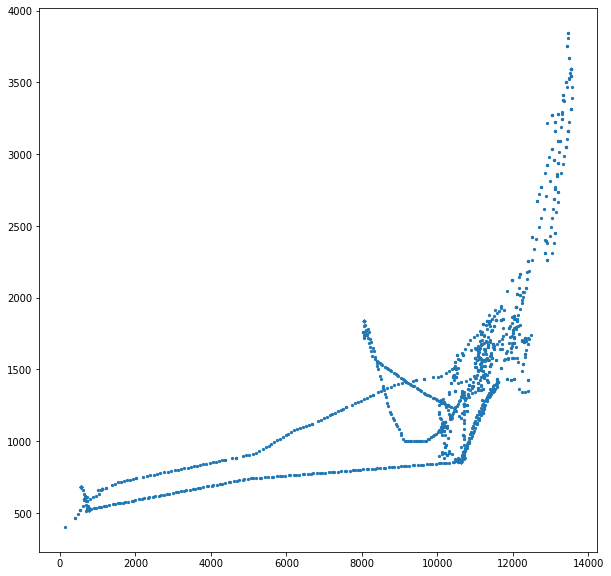

In [64]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
example = dataset[10]

champs   = example["champs"]
minions  = example["minions"]
turrets  = example["turrets"]
jungle   = example["jungle"]
others   = example["others"]
missiles = example["missiles"]

champ_pos_x = champs.iloc[:, 7]
champ_pos_y = champs.iloc[:, 9]
plt.scatter(champ_pos_x, champ_pos_y, s=5)

## Visualise Global Intent Regions

In [65]:
global_region_mult = 2
map_dim  = 16_000
map_width = map_height = map_dim
map_n = int(map_dim / 1000) * global_region_mult
global_intent_region_size = int(map_dim / map_n)
print("Map Region Count, Map Region Size:", map_n, (global_intent_region_size, global_intent_region_size))

Map Region Count, Map Region Size: 32 (500, 500)


### Plot Global Intent Regions

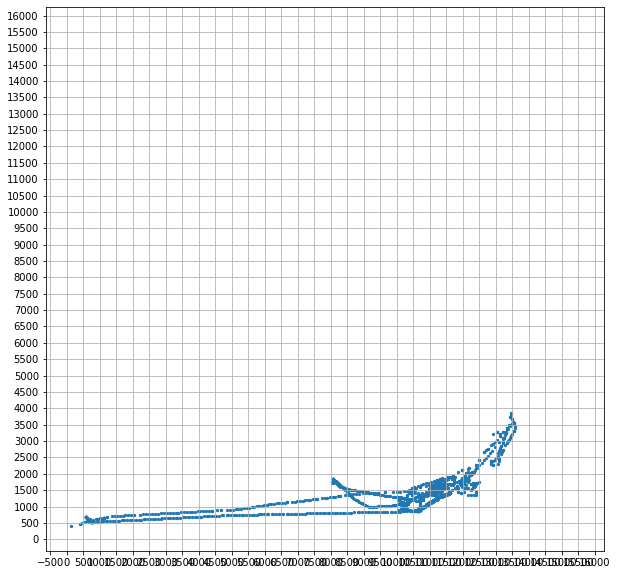

In [66]:
import matplotlib.ticker as plticker

def plot_global_intent_regions(x_pos, y_pos):
    fig, ax = plt.subplots()

    intervals = global_intent_region_size
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')

    ax.scatter(x_pos, y_pos, s=5)
    ax.scatter(15_500, 15_500, c="white")
    
plot_global_intent_regions(champ_pos_x, champ_pos_y)

### Visualise Global Intent Region Hotspots

#### Raw Global Intent Region Heatmap

In [67]:
champ_pos = pd.concat([champ_pos_x, champ_pos_y], axis=1)

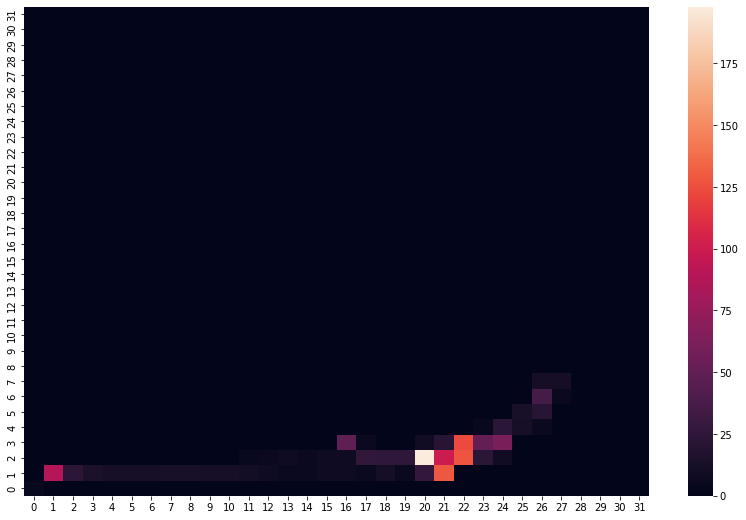

In [68]:
import math
import sys
import seaborn as sns
from numpy import interp

# Reset to default
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 9)

def global_heatmap(pos_df):
    global_intent_sum_matrix = np.zeros((map_n, map_n))

    #%%timeit
    def inc_global_region(row, global_intent_sum_matrix):
        # Gets `N` global intent region for current row for champ
        x_n = math.floor(interp(row[0], [0, 16000], [0, map_n]))
        y_n = math.floor(interp(row[1], [0, 16000], [0, map_n]))
        global_intent_sum_matrix[y_n, x_n] += 1

    
    pos_df.apply(lambda row: inc_global_region(row, global_intent_sum_matrix), axis=1)
    np.set_printoptions(threshold=8)
    result = global_intent_sum_matrix

    ax = sns.heatmap(result)
    ax.invert_yaxis()
    return result, global_intent_sum_matrix

result, global_intent_sum_matrix = global_heatmap(champ_pos)

#### Log10 Normalised Global Intent Region Heatmap

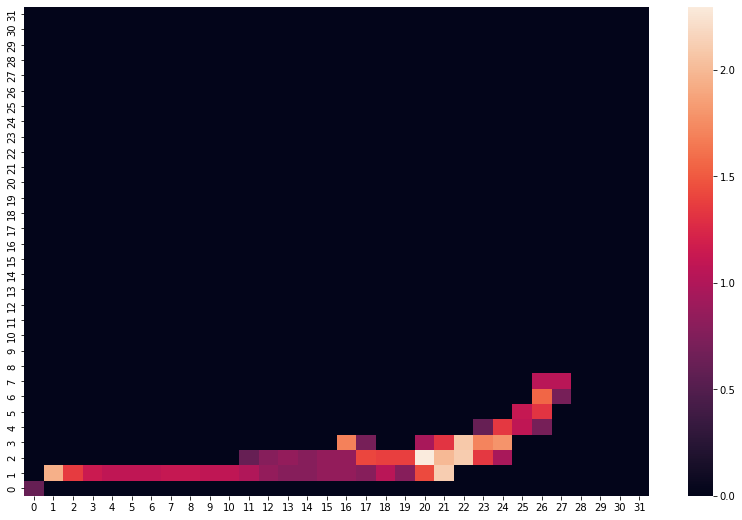

In [69]:
def global_heatmap_normalised(result, global_intent_sum_matrix):
    result = np.where(global_intent_sum_matrix > 0.0000001, global_intent_sum_matrix, 0)
    np.log10(result, out=result, where=result > 0)

    ax = sns.heatmap(result)
    ax.invert_yaxis()

global_heatmap_normalised(result, global_intent_sum_matrix)